In [13]:
%pwd

'C:\\jupyter-notebook'

In [15]:
import numpy as np
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254 # 1/10mm->inches
inches.shape

(365,)

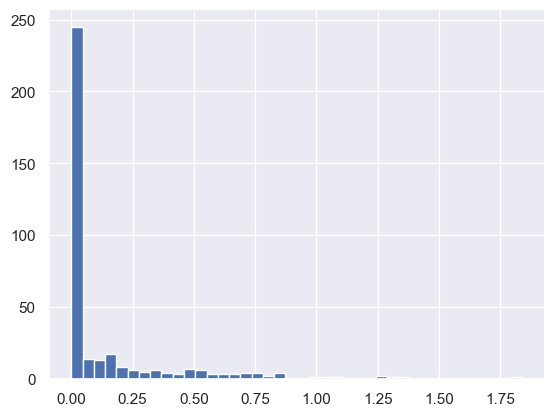

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(inches,40);

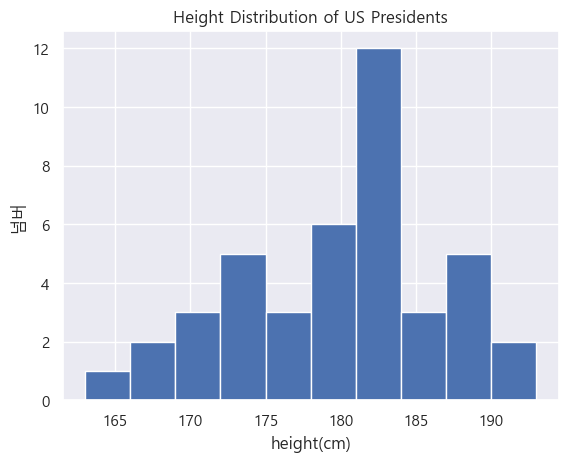

In [12]:
data = pd.read_csv('data/president_heights.csv')
heights= np.array(data['height(cm)'])
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.rc('font',family='Malgun Gothic')  # 한글깨짐 방지
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height(cm)')
plt.ylabel('넘버');

In [ ]:
In [217]: x=np.linspace(0,5,50)
In [218]: y=np.linspace(0,5,50)[:,np.newaxis]
In [219]: z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

In [220]: %matplotlib inline
In [221]: import matplotlib.pyplot as plt

In [222]: plt.imshow(z,origin='lower',extent=[0,5,0,5],cmap='viridis')
     ...: plt.colorbar();
# In case of '-' ERROR
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/unicode_minus.html

### Boolean

In [7]:
a = np.arange(3)

In [8]:
a

array([0, 1, 2])

In [10]:
x=np.arange(0,5)
x<3

array([ True,  True,  True, False, False])

In [12]:
np.sum(x<3,axis=0)

3

In [15]:
x[x<3]

array([0, 1, 2])

### Fancy Indexing

In [22]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100,size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [23]:
ind = [3,7,4]
x[ind] #fancy indexing

array([71, 86, 60])

In [30]:
ind = np.array([[3,7],[4,1]])
x[ind] # index 형식대로 나옴

array([[71, 86],
       [60, 92]])

In [37]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
# pair indexing: row,col 배열을 조합하여 결과 도출
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [42]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [40]:
X[row[:,np.newaxis],col] #BroadCasting
# [[0],2] BroadCasting => [[0],[2,1,3]]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [44]:
X[[0],col]

array([2, 1, 3])

In [45]:
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask] #행 인덱스는 슬라이싱, 열 인덱스는 마스크

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [46]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
# Covariance matrix of the distribution
# Random 100 dots 
X = rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

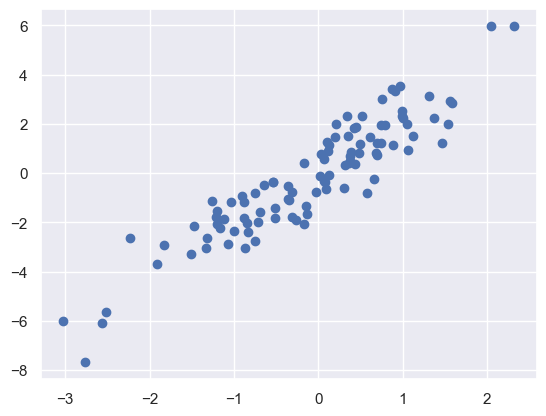

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1])

In [48]:
indices = np.random.choice(X.shape[0],20, replace=False)
indices

array([39, 44, 60, 76, 87, 64, 92, 57, 99, 21, 75, 94, 15, 13, 23, 48, 25,
       36,  4, 19])

In [49]:
selection = X[indices]
selection.shape

(20, 2)

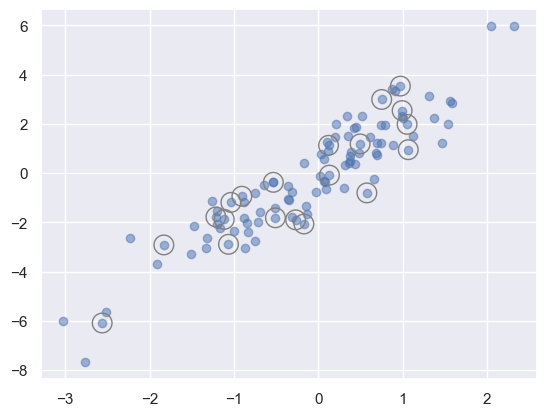

In [60]:
plt.scatter(X[:,0],X[:,1],alpha=0.5)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',color='gray',s=200)

In [61]:
# 특정값 삽입, 변경 가능
x = np.arange(10)
i = np.array([2,4,1,8])
x[i]=99
x[i]-= 50
print(x)

[ 0 49 49  3 49  5  6  7 49  9]


In [ ]:
# 중복 사용 시 주의
x[[0,0]] = [100,200]
# index 0에 뒤에 값이 될 가능성 높음

In [71]:
import numpy as np
x= np.zeros(10)
i = [2,3,3,4,4,4]
x[i]+=1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [63]:
# Use np.bincount to accumulate values at repeated indices
x= np.zeros(10)
x += np.bincount(i, minlength=len(x))
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

In [72]:
np.add.at(x,i,2)
x

array([0., 0., 3., 5., 7., 0., 0., 0., 0., 0.])

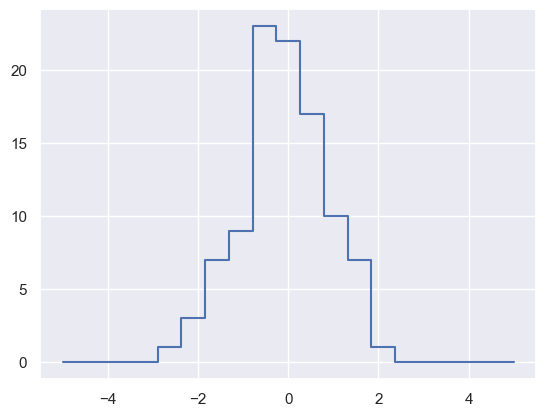

In [76]:
np.random.seed(42)
x=np.random.randn(100)
#직접 히스토그램 계산하기
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# 각 x에 대한 적절한 구간찾기
i = np.searchsorted(bins,x)
np.add.at(counts,i,1)

plt.plot(bins,counts,drawstyle='steps')

### Array Sort

In [87]:
L = [3,1,4,1,5,9,2,6]
# L은 바뀌지 않음
print(sorted(L))
print(L)
# L 바뀜
L.sort()
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]
[3, 1, 4, 1, 5, 9, 2, 6]
[1, 1, 2, 3, 4, 5, 6, 9]


In [92]:
L = np.array([3,1,4,1,5,9,2,6])
np.sort(L)
i = np.argsort(L) # 정렬된 인덱스만
# original index before sorting
print(i)
L[i] #인덱스로 정렬

[1 3 6 0 2 4 7 5]


array([1, 1, 2, 3, 4, 5, 6, 9])

In [97]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(3,5))
print(X)
# X의 각 열 정렬
print(np.sort(X,axis=0))
# X의 각 행 정렬
print(np.sort(X,axis=1))

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]]
[[3 2 6 2 4]
 [6 3 7 4 5]
 [9 7 7 7 6]]
[[3 4 6 6 7]
 [2 4 6 7 9]
 [2 3 5 7 7]]


In [103]:
print(np.partition(X,1,axis=1))
print(np.partition(X,2,axis=1))
#np.partition(~, 2)와 같은 경우는 리스트에서 순서 상관없이 작은 숫자 2개를 뽑아 왼쪽으로 놓겠다는 의미

#np.partition(~, -2)와 같은 경우는 리스트에서 순서 상관없이 큰 값 2개를 뽑아 오른쪽으로 놓겠다는 의미이다.

[[3 4 7 6 6]
 [2 4 6 7 9]
 [2 3 7 7 5]]
[[3 4 6 7 6]
 [2 4 6 7 9]
 [2 3 5 7 7]]


[[0.84228477 0.44975413]
 [0.39515024 0.92665887]
 [0.727272   0.32654077]
 [0.57044397 0.52083426]
 [0.96117202 0.84453385]
 [0.74732011 0.53969213]
 [0.58675117 0.96525531]
 [0.60703425 0.27599918]
 [0.29627351 0.16526694]
 [0.01563641 0.42340148]]


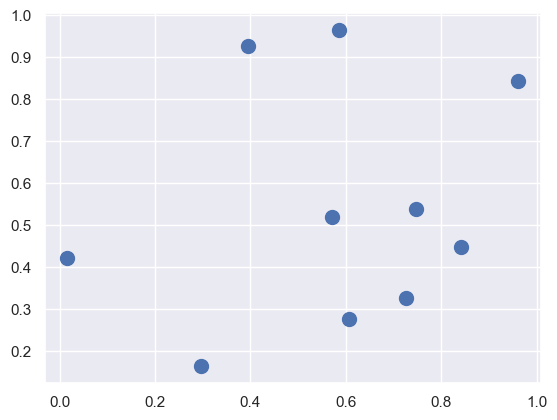

In [113]:
#2차원 평면에 임의의 점 10개의 집합(2D)
X=rand.rand(10,2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1],s=100)
print(X)

In [106]:
dist_sq = np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1)
dist_sq

In [115]:
print(X[:,np.newaxis,:])
print(X[np.newaxis,:,:])

[[[0.84228477 0.44975413]]

 [[0.39515024 0.92665887]]

 [[0.727272   0.32654077]]

 [[0.57044397 0.52083426]]

 [[0.96117202 0.84453385]]

 [[0.74732011 0.53969213]]

 [[0.58675117 0.96525531]]

 [[0.60703425 0.27599918]]

 [[0.29627351 0.16526694]]

 [[0.01563641 0.42340148]]]
[[[0.84228477 0.44975413]
  [0.39515024 0.92665887]
  [0.727272   0.32654077]
  [0.57044397 0.52083426]
  [0.96117202 0.84453385]
  [0.74732011 0.53969213]
  [0.58675117 0.96525531]
  [0.60703425 0.27599918]
  [0.29627351 0.16526694]
  [0.01563641 0.42340148]]]


In [119]:
# -- 각 쌍의 점 사이의 좌표 차이 계산(For Every Couple)
differences = X[:,np.newaxis,:]-X[np.newaxis,:,:] #BroadCasting?
differences.shape # (10, 10, 2)
# print(differences)

# -- 제곱 
sq_differences = differences **2
sq_differences.shape # (10, 10, 2)
# print(sq_differences)

# -- 거리를 위해서 좌표차이를 제곱 후 더함
dist_sq= sq_differences.sum(-1)
dist_sq.shape # (10, 10)
print(dist_sq)

[[0.         0.42736742 0.02840947 0.07894981 0.1699852  0.01710713
  0.33103889 0.08553359 0.37906127 0.68404199]
 [0.42736742 0.         0.47044659 0.19542151 0.32712518 0.27376687
  0.0382006  0.46825286 0.58949427 0.39729874]
 [0.02840947 0.47044659 0.         0.06234499 0.32302605 0.04583543
  0.42770237 0.01701157 0.21176895 0.51580721]
 [0.07894981 0.19542151 0.06234499 0.         0.25744983 0.03164079
  0.19777599 0.06128306 0.20159757 0.31730458]
 [0.1699852  0.32712518 0.32302605 0.25744983 0.         0.13866111
  0.15476465 0.44864523 0.90349357 1.07139008]
 [0.01710713 0.27376687 0.04583543 0.03164079 0.13866111 0.
  0.2068864  0.0892141  0.34363726 0.54888456]
 [0.33103889 0.0382006  0.42770237 0.19777599 0.15476465 0.2068864
  0.         0.47548541 0.72435866 0.61977764]
 [0.08553359 0.46825286 0.01701157 0.06128306 0.44864523 0.0892141
  0.47548541 0.         0.10883387 0.37147884]
 [0.37906127 0.58949427 0.21176895 0.20159757 0.90349357 0.34363726
  0.72435866 0.1088338

In [123]:
# axis=-1 means that the sum will be calculated along the last axis of the array. In a 2D array, the last axis is the column axis. 
a = np.array([[1,2,3],[0,0,0]])
a.sum(-1)

array([6, 0])

In [124]:
#To check if distance for oneselves are all zero
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [126]:
# Getting the nearest index for the most left col
nearest = np.argsort(dist_sq,axis=1)
nearest

array([[0, 5, 2, 3, 7, 4, 6, 8, 1, 9],
       [1, 6, 3, 5, 4, 9, 0, 7, 2, 8],
       [2, 7, 0, 5, 3, 8, 4, 6, 1, 9],
       [3, 5, 7, 2, 0, 1, 6, 8, 4, 9],
       [4, 5, 6, 0, 3, 2, 1, 7, 8, 9],
       [5, 0, 3, 2, 7, 4, 6, 1, 8, 9],
       [6, 1, 4, 3, 5, 0, 2, 7, 9, 8],
       [7, 2, 3, 0, 5, 8, 9, 4, 1, 6],
       [8, 7, 9, 3, 2, 5, 0, 1, 6, 4],
       [9, 8, 3, 7, 1, 2, 5, 6, 0, 4]], dtype=int64)

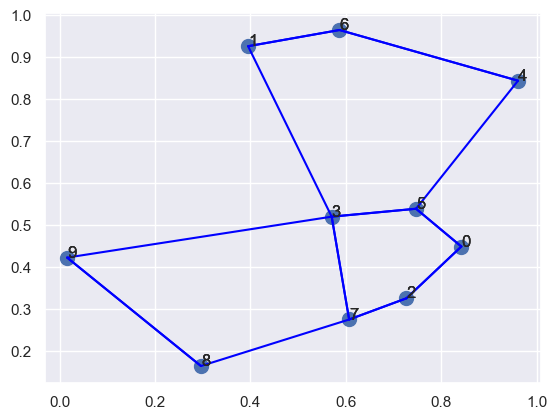

In [139]:
K = 2 # for the two nearest value
nearest_partition = np.argpartition(dist_sq,K+1,axis=1)
plt.scatter(X[:,0],X[:,1],s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        # X[i] to X[j], create line
        # use magic func: zip
        plt.plot(*zip(X[j],X[i]),color='blue' )
        plt.text(X[i,0], X[i,1], str(i))

## DATA
data frame
데이터 전처리, 변환 :cleansing
data muniging 

In [ ]:
import numpy as np
name = ['Alice','Bob','Cathy','Doug']
age = [25.34.56.11]
weight = [55.0,57.5, 45.7,76.3]

In [ ]:
x = np.zeros(4,dtype=int)

In [142]:
# 구조화된 배열을 위해 복합 데이터 타입 사용
data = np.zeros(4,dtype={'name':('name','age','weight'),'formats':('U10','i4','f8')})
print(data.dtype)
[('name','<U10'),('age','<i4'),('weight','<f8')]

ValueError: invalid literal for int() with base 10: 'age'